# Integration with bbknn

In [1]:
import scanpy as sc
import anndata as ad

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


from the paper:

> To remove low quality cells and likely multiplet captures, we filtered out cells with features < 700, mitochondrial gene percentage > 5%, then removed doublets with DoubletFinder (v2.0.3, RRID:SCR_018771) 69. Possible estimation and removal of cell free mRNA contamination was removed with SoupX (v.1.6.0, RRID:SCR_019193) 70. Gene expression differences were identified between Saline and Psilocybin samples (N = 4/group) using DESeq2 (v1.38.0, RRID:SCR_015687) 71. The enrichment analysis was performed with clusterProfiler (v4.8.1, RRID:SCR_016884) 72 and ReactomePA (v1.44.0, RRID:SCR_019316) 73.

In [2]:
# _psilo = sc.read_10x_mtx("/Users/npapadop/Documents/teaching/2024/GSE246451/psilo/")
# _psilo.obs.index = _psilo.obs.index.str.replace("-1", "-p")
# _psilo.obs["condition"] = "psilocybin"
# _saline = sc.read_10x_mtx("/Users/npapadop/Documents/teaching/2024/GSE246451/saline/")
# _saline.obs.index = _saline.obs.index.str.replace("-1", "-s")
# _saline.obs["condition"] = "saline"

# adata = ad.concat((_psilo, _saline))
# del _psilo, _saline

# sc.pp.filter_cells(adata, min_genes=700)
# sc.pp.filter_genes(adata, min_cells=3)

# adata.var["mt"] = adata.var_names.str.startswith("mt-")
# sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)

# adata.write("psilo_both.h5ad")

In [3]:
adata = sc.read_h5ad("psilo_both.h5ad")

In [4]:
%matplotlib inline

In [5]:
adata

AnnData object with n_obs × n_vars = 25018 × 25328
    obs: 'condition', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [6]:
import bbknn

In [7]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.normalize_total(adata)

sc.tl.pca(adata, n_comps=80)

In [8]:
bbknn.bbknn(adata, batch_key="condition")

In [9]:
sc.tl.umap(adata, min_dist=0.1)
sc.tl.leiden(adata, resolution=0.8)

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


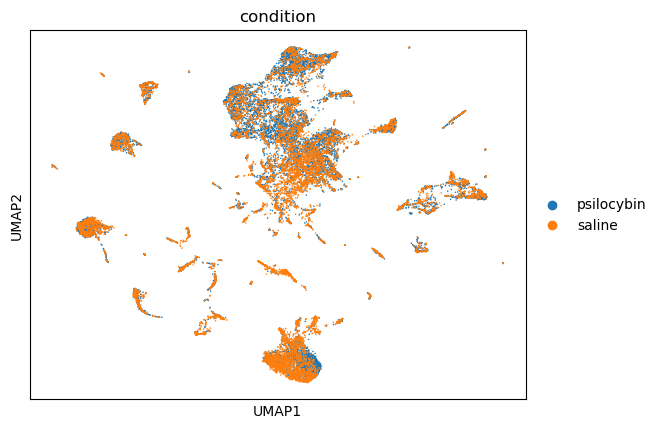

In [10]:
sc.pl.umap(adata, color="condition")

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


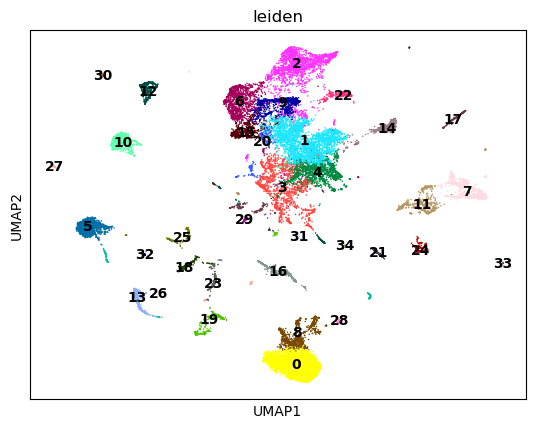

In [11]:
sc.pl.umap(adata, color="leiden", legend_loc="on data")

In [12]:
adata.obs["condition"].value_counts()

psilocybin    13099
saline        11919
Name: condition, dtype: int64

In [13]:
pd.DataFrame(adata.obs.groupby("leiden")["condition"].value_counts()).to_csv("./batch_balance.csv")

In [14]:
sc.tl.paga(adata, groups="leiden")

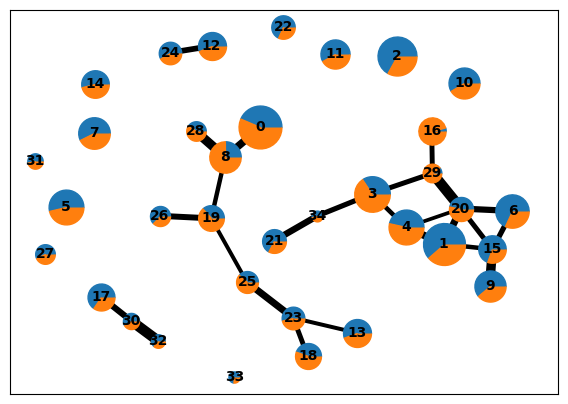

In [15]:
sc.pl.paga(adata, threshold=0.35, color="condition", node_size_scale=3,)